# Introducing SIREN

In [1]:
# Import libraries
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
                             plot_confusion_matrix, classification_report, roc_auc_score, roc_curve,plot_roc_curve, ConfusionMatrixDisplay)

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, VotingClassifier, BaggingClassifier)

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from catboost import CatBoostClassifier

# Import custom module
import SIREN_func
from pycaret.classification import *

C:\Users\cheon\anaconda3\envs\siren\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [26]:
 # Ensuring the notebook remains tidy
import warnings
warnings.filterwarnings('ignore')

In [27]:
full = pd.read_pickle('../data/full.pkl')

In [28]:
# Previewing our dataset
SIREN_func.eda_clean(full)

Dataset Statistics:
Shape of dataframe: (840, 121)
% of Null values in dataframe: 0.0%
% duplicate rows: 0.0%

Column names: Index(['eri', 'eri_1m_chg', 'eri_3m_chg', 'cesiusd_1w_chg', 'cesiusd_4w_chg',
       'cesiusd_13w_chg', 'cesiusd_26w_chg', 'us_hy_1w_chg', 'us_hy_4w_chg',
       'us_hy_13w_chg',
       ...
       'spx_52w', 'vix', 'move', 'cvix', 'skew', 'aaii_bull', 'aaii_bear',
       'cftc_nc_net', 'cftc_nc_net_pct_oi', 'cboe_us'],
      dtype='object', length=121)
Columns Count: 
float64    121
dtype: int64


In [29]:
full['spx'] = full['spx'].copy().apply(lambda x: 1 if x <= 0 else 0)
combined = full.copy().drop(columns=['sx5e', 'ftse100', 'tpx', 'msci_axj', 'msci_acw']).reset_index()
# combined['month'] = combined['date'].dt.month

In [30]:
train = combined.loc[combined['date'].dt.year < 2019]
# validate = combined.loc[(combined['date'] >= '2015') & (combined['date'] < '2019')].drop(columns='date')
# test = combined.loc[(combined['date'].dt.year >= 2019) & (combined['date'].dt.year != 2020)].drop(columns='date')
test = combined.loc[(combined['date'].dt.year >= 2019)]

In [31]:
pyc = setup(train, target='spx', test_data=test, feature_interaction=False, session_id=42, remove_multicollinearity=True, multicollinearity_threshold=0.7, normalize=True, normalize_method='zscore', fix_imbalance=True, ignore_features=['date'])
# data_split_shuffle=False, fold_strategy='timeseries', fold=5)

,Description,Value
0,session_id,42
1,Target,spx
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(679, 117)"
5,Missing Values,0
6,Numeric Features,115
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [32]:
# Comparison of selected models
best = compare_models(cross_validation=False, probability_threshold=0.5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6708,0.6785,0.6458,0.4627,0.5391,0.2938,0.3037,0.6100
catboost,CatBoost Classifier,0.6708,0.6243,0.3750,0.4390,0.4045,0.1790,0.1800,10.5400
et,Extra Trees Classifier,0.6584,0.5634,0.1458,0.3333,0.2029,0.0262,0.0298,0.2500
gbc,Gradient Boosting Classifier,0.6522,0.5988,0.3958,0.4130,0.4043,0.1588,0.1589,1.5400
qda,Quadratic Discriminant Analysis,0.6460,0.4983,0.1875,0.3333,0.2400,0.0323,0.0345,0.0800
nb,Naive Bayes,0.6335,0.5118,0.1875,0.3103,0.2338,0.0119,0.0125,0.0300
lightgbm,Light Gradient Boosting Machine,0.6335,0.6141,0.4583,0.4000,0.4272,0.1596,0.1604,0.4800
rf,Random Forest Classifier,0.6273,0.5669,0.2708,0.3421,0.3023,0.0528,0.0534,0.3600
ada,Ada Boost Classifier,0.6211,0.5316,0.3333,0.3556,0.3441,0.0781,0.0782,0.3700
ridge,Ridge Classifier,0.6087,0.6134,0.6250,0.4000,0.4878,0.1952,0.2080,0.0400


In [34]:
model=create_model('xgboost', cross_validation=False, probability_threshold=0.55)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6832,0.6785,0.6042,0.4754,0.5321,0.2978,0.3027


In [35]:
plot_model(model, plot='parameter')

,Parameters
objective,binary:logistic
use_label_encoder,True
base_score,None
booster,gbtree
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,None
enable_categorical,False
gamma,None
gpu_id,None


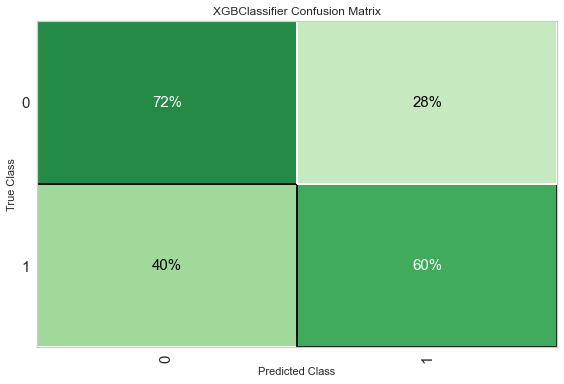

In [36]:
plot_model(model, plot='confusion_matrix', plot_kwargs={'percent': True})

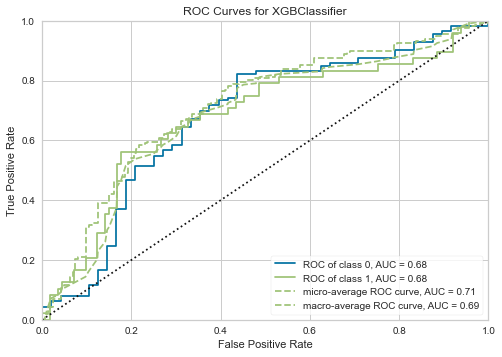

In [37]:
plot_model(model, plot='auc', plot_kwargs={'percent': True})

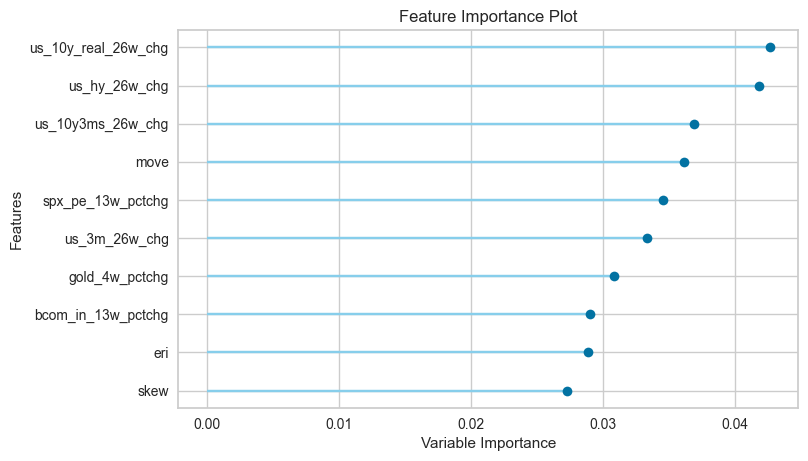

In [38]:
plot_model(model, plot='feature')

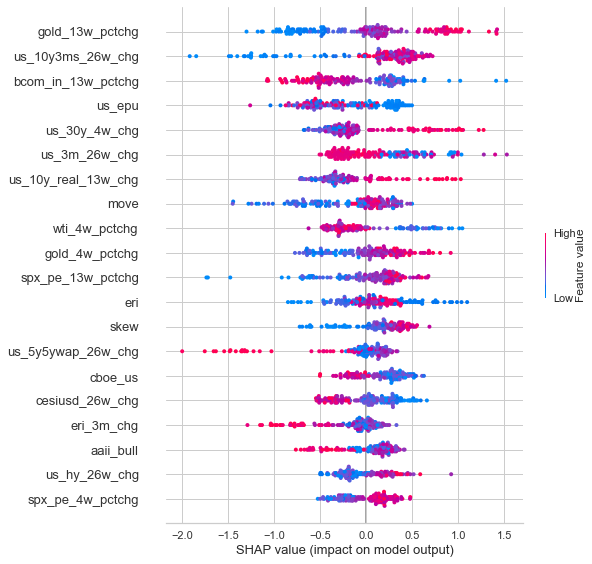

In [39]:
interpret_model(model)

In [68]:
interpret_model(model, plot='reason', observation=160)

In [25]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.6025,0.5745,0.5000,0.3750,0.4286,0.1332,0.1365


,eri,eri_1m_chg,eri_3m_chg,cesiusd_1w_chg,cesiusd_4w_chg,cesiusd_13w_chg,cesiusd_26w_chg,us_hy_1w_chg,us_hy_4w_chg,us_hy_13w_chg,...,move,cvix,skew,aaii_bull,aaii_bear,cftc_nc_net_pct_oi,cboe_us,spx,Label,Score
0,-0.201399,-0.799682,-0.970717,0.517913,-0.158032,-0.281378,-0.337062,-0.797425,0.713810,1.045253,...,-0.550705,-0.337080,-1.511250,-0.488058,1.006331,1.130039,-0.586058,0,0,0.9696
1,-0.232994,-0.647817,-0.952639,0.453146,0.054504,-0.058029,-0.276094,-1.770932,0.084979,0.583328,...,-0.847065,-0.607964,-0.600689,0.181999,-0.486765,0.954901,0.948719,0,0,0.9610
2,-0.304012,-0.608571,-0.985533,-0.056898,0.331139,-0.074214,-0.084480,-0.743270,-1.143716,0.460018,...,-0.911922,-0.725975,0.839547,-0.425240,0.279840,0.550889,-1.012385,0,1,0.5656
3,-0.417244,-0.775076,-1.060725,0.752695,0.695488,0.103818,0.121650,0.225580,-1.164826,0.292899,...,-0.950502,-0.830499,0.234886,0.083461,-0.158061,0.148208,-1.268182,0,0,0.7972
4,-0.562851,-1.088296,-1.162787,2.031853,1.326350,0.353063,0.628265,-0.442726,-1.030628,0.304412,...,-1.061736,-0.870961,0.225364,-0.643255,-0.220459,0.040782,-0.500793,0,0,0.7969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.463719,0.715354,-3.148922,-0.324064,-0.461656,0.710746,0.089714,0.007770,-0.541160,-0.065123,...,-0.212278,-1.295802,3.599799,0.088388,-0.360855,0.877025,-0.927120,1,1,0.6685
157,1.519591,0.960441,-2.705815,-1.279384,-1.045288,0.349826,0.070843,0.486600,-0.057501,0.009176,...,-0.284588,-1.305917,1.785817,-0.515156,-0.048865,0.912987,-0.586058,1,1,0.5097
158,1.555139,0.833586,-2.241585,-0.518366,-0.957575,0.320694,-0.316740,-0.184945,-0.196142,0.013704,...,-0.227581,-1.275571,1.156161,-1.488216,0.508261,0.701999,-0.159731,1,0,0.8656
159,1.519666,0.433750,-1.865597,-0.032610,-0.896850,0.482541,-0.161416,0.623489,0.355713,0.152333,...,-0.094362,-1.171047,1.433494,-1.968588,1.444232,1.017985,1.375046,1,0,0.7830


## Appendix
Carry out two-tailed t-test ()

In [26]:
X = full.copy().drop(columns=['spx', 'sx5e', 'ftse100', 'tpx', 'msci_axj', 'msci_acw']).reset_index()

X['month'] = X['date'].dt.month
# X['week'] = X['date'].dt.isocalendar().week
# X['vol_regime'] = X['vix'].apply(lambda x: 1 if x <=15 else 0)
# X['move_regime'] = X['move'].apply(lambda x: 1 if x <=60 else 0)

In [27]:
X_train = X.loc[X['date'] < '2015'].drop(columns='date')
X_validate = X.loc[(X['date'] >= '2015') & (X['date'] < '2019')].drop(columns='date')
X_test = X.loc[(X['date'] >= '2019') & (X['date'] != '2020')].drop(columns='date')

In [28]:
y = full['spx'].copy().apply(lambda x: 1 if x <= 0 else 0).reset_index()
y_train = y.loc[y['date'] < '2015'].drop(columns='date')
y_validate = y.loc[(y['date'] >= '2015') & (y['date'] < '2019')].drop(columns='date')
y_test = y.loc[(y['date'] >= '2019') & (y['date'] != '2020')].drop(columns='date')

In [29]:
# def run_model(mod, mod_params={}, grid_search=False):
#     # Initialise dictionary to store model results
#     results = {}

#     # Create pipeline
#     pipe = Pipeline([
#         ('ss', StandardScaler()),
#         (mod, models[mod])
#         ])

#     if grid_search:
#         # Create list to store gridsearch results
#         gs = GridSearchCV(pipe, param_grid=mod_params, cv=5, verbose=1, scoring='roc_auc', n_jobs=-1)
#         gs.fit(X_train, y_train)
#         pipe = gs

#     else:
#         pipe.fit(X_train, y_train)

#     # Retrieve metrics
#     val_predictions = pipe.predict(X_validate)
#     test_predictions = pipe.predict(X_test)
#     y_validate_pred_prob = pipe.predict_proba(X_validate)[:,1]
#     y_test_pred_prob = pipe.predict_proba(X_test)[:,1]

#     results['model'] = mod
#     results['val_accuracy'] = accuracy_score(y_validate, val_predictions)
#     results['val_f1'] = f1_score(y_validate, val_predictions)
#     results['val_recall'] = recall_score(y_validate, val_predictions)
#     results['val_precision'] = precision_score(y_validate, val_predictions)
#     results['val_auc'] = roc_auc_score(y_validate, y_validate_pred_prob)

#     results['test_accuracy'] = accuracy_score(y_test, test_predictions)
#     results['test_f1'] = f1_score(y_test, test_predictions)
#     results['test_recall'] = recall_score(y_test, test_predictions)
#     results['test_precision'] = precision_score(y_test, test_predictions)
#     results['test_auc'] = roc_auc_score(y_test, y_test_pred_prob)

#     if grid_search == True:
#         gs_list.append(results)
#         print(f'Best parameters are:')
#         display(pipe.best_params_)

#     else: init_list.append(results)

#     return pipe


In [30]:
# %%time

# X_train_copy = X_train.astype(float).copy()
# y_train_copy = y_train.astype(float).copy()
  
    
# # Instiantiate models
# models = {
#     'lr': LogisticRegression(max_iter=5_000, random_state=42, solver='saga'), 
#     'rf': RandomForestClassifier(random_state=42, class_weight='balanced'),
#     'gb': GradientBoostingClassifier(random_state=42),
#     'dt': DecisionTreeClassifier(random_state=42),
#     'et': ExtraTreesClassifier(random_state=42),
#     'ada': AdaBoostClassifier(random_state=42),
#     'svc': SVC(random_state=42, probability=True),
#     'xgb': XGBClassifier(random_state=42, eval_metric='mlogloss', verbosity=1, n_jobs=-1)}

# # Instantiate lists to store results
# init_list = []
# gs_list = []

# for m in models:
#     run_model(m)

# result_df = pd.DataFrame(init_list).sort_values(by=["val_f1"], ascending=False).reset_index(drop=True)
# display(result_df)

# X_train = X_train_copy
# y_train = y_train_copy